11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training Shallow Network ...
Epoch 1/10
422/422 - 3s - 7ms/step - accuracy: 0.8961 - loss: 0.3783 - val_accuracy: 0.9568 - val_loss: 0.1651
Epoch 2/10
422/422 - 2s - 5ms/step - accuracy: 0.9505 - loss: 0.1743 - val_accuracy: 0.9663 - val_loss: 0.1263
Epoch 3/10
422/422 - 3s - 7ms/step - accuracy: 0.9638 - loss: 0.1261 - val_accuracy: 0.9718 - val_loss: 0.1034
Epoch 4/10
422/422 - 2s - 5ms/step - accuracy: 0.9713 - loss: 0.0987 - val_accuracy: 0.9748 - val_loss: 0.0920
Epoch 5/10
422/422 - 2s - 4ms/step - accuracy: 0.9765 - loss: 0.0804 - val_accuracy: 0.9770 - val_loss: 0.0829
Epoch 6/10
422/422 - 2s - 4ms/step - accuracy: 0.9806 - loss: 0.0668 - val_accuracy: 0.9752 - val_loss: 0.0809
Epoch 7/10
422/422 - 2s - 4ms/step - accuracy: 0.9838 - loss: 0.0556 - val_accuracy: 0.9768 - val_loss: 0.0840
Epoch 8/10
422/422 - 2s - 4ms/step - accuracy: 0.9872 - loss: 0.0473 - val_accuracy: 0.9793 - val_loss: 0.0748
Epoch 9/10
422/422 - 2s - 4ms/step - accuracy: 0.9886 - loss: 0.0409 - val_accuracy

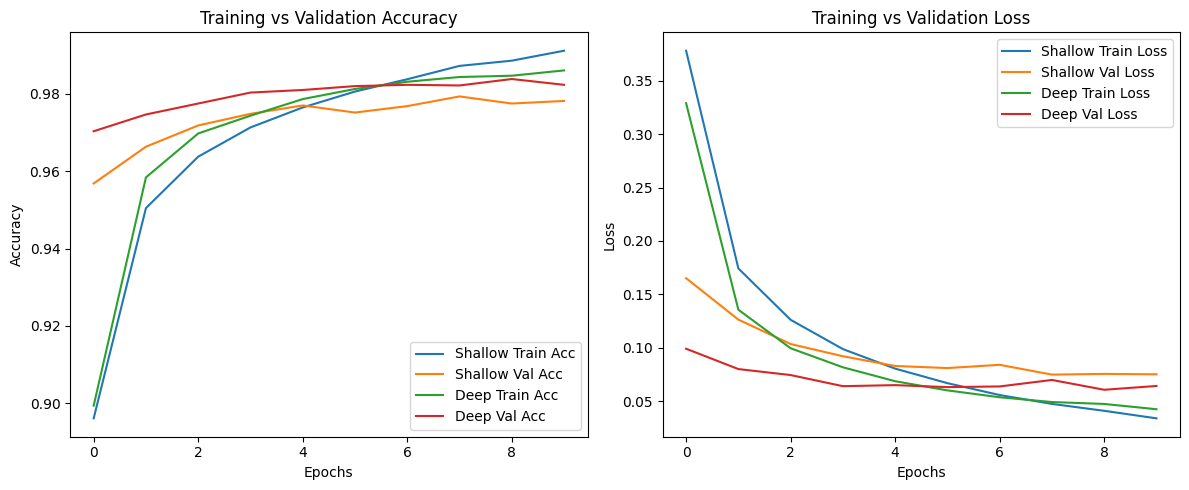

In [1]:
# Shallow vs Deep Neural Network on MNIST (clean, runnable)
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

# --------------------------
# Step 1: Load and preprocess MNIST data
# --------------------------
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values (0-255 -> 0-1)
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# --------------------------
# Step 2: Define Shallow Neural Network (1 hidden layer)
# --------------------------
shallow_model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

shallow_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# --------------------------
# Step 3: Define Deep Neural Network (3 hidden layers)
# --------------------------
deep_model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(512, activation='relu'),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

deep_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# --------------------------
# Step 4: Train both models
# --------------------------
print("Training Shallow Network ...")
history_shallow = shallow_model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.1,
    verbose=2
)

print("\nTraining Deep Network ...")
history_deep = deep_model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.1,
    verbose=2
)

# --------------------------
# Step 5: Evaluate models on test data
# --------------------------
test_loss_shallow, test_acc_shallow = shallow_model.evaluate(x_test, y_test, verbose=0)
test_loss_deep, test_acc_deep = deep_model.evaluate(x_test, y_test, verbose=0)

print("\n===== Performance Comparison =====")
print(f"Shallow Network Test Accuracy : {test_acc_shallow:.4f}")
print(f"Deep Network    Test Accuracy : {test_acc_deep:.4f}")

# --------------------------
# Step 6: Plot training curves
# --------------------------
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_shallow.history['accuracy'], label='Shallow Train Acc')
plt.plot(history_shallow.history['val_accuracy'], label='Shallow Val Acc')
plt.plot(history_deep.history['accuracy'], label='Deep Train Acc')
plt.plot(history_deep.history['val_accuracy'], label='Deep Val Acc')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history_shallow.history['loss'], label='Shallow Train Loss')
plt.plot(history_shallow.history['val_loss'], label='Shallow Val Loss')
plt.plot(history_deep.history['loss'], label='Deep Train Loss')
plt.plot(history_deep.history['val_loss'], label='Deep Val Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
